In [1]:
# Pre Req Imports
import matplotlib.pyplot as plt
import pandas as pd
import io
import os
import csv
import numpy as np
import requests
import json

# for plotting graphs
# Import API key
#from config import api_key

# Define Excel Sheets

In [2]:
# Create six different crime_property_merge csv files from the main merge file above, each one named for, and only containing rows corresponding to one of the six 'Offence Division's
#offence_div = crime_property_merged['Offence Division'].unique()
#for div in offence_div:
    #crime_div_property_merged = crime_property_merged[crime_property_merged['Offence Division'] == div]
    #crime_div_property_merged.to_csv(f'Resources/{div}.csv', index=False)

In [3]:
crime_data_to_load = "Resources/A Crimes against the person.csv"

In [4]:
crime_property_merged = pd.read_csv(crime_data_to_load)

In [5]:
assault_data = crime_property_merged[crime_property_merged["Offence Subdivision"] == "A20 Assault and related offences"]
grouped_data = assault_data.groupby("Offence Count").count()
assault_data.head()

,Year,Local Government Area,Postcode,Suburb/Town Name,Offence Division,Offence Subdivision,Offence Count,Median
0,2013,Yarra,3067,Abbotsford,A Crimes against the person,A20 Assault and related offences,40,792500
5,2013,Moonee Valley,3040,Aberfeldie,A Crimes against the person,A20 Assault and related offences,11,947500
12,2013,Moonee Valley,3042,Airport West,A Crimes against the person,A20 Assault and related offences,41,532000
17,2013,Brimbank,3021,Albanvale,A Crimes against the person,A20 Assault and related offences,42,313000
22,2013,Port Phillip,3206,Albert Park,A Crimes against the person,A20 Assault and related offences,26,1360000


In [57]:
summed_data = assault_data.groupby(["Suburb/Town Name", "Year"])["Offence Count", "Median"].sum().reset_index()
summed_data = summed_data.rename(columns={"Offence Count": "Total Assault Offences", "Suburb/Town Name": "Suburb"})
summed_data.head(20)

C:\Users\shang\AppData\Local\Temp\ipykernel_18296\2267480992.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  summed_data = assault_data.groupby(["Suburb/Town Name", "Year"])["Offence Count", "Median"].sum().reset_index()


,Suburb,Year,Total Assault Offences,Median
0,Abbotsford,2013,40,792500
1,Abbotsford,2014,49,862500
2,Abbotsford,2015,48,925000
3,Abbotsford,2016,72,1187500
4,Abbotsford,2017,79,1280000
5,Abbotsford,2018,61,1192500
6,Abbotsford,2019,98,1050000
7,Abbotsford,2020,82,1200000
8,Abbotsford,2021,90,1375000
9,Abbotsford,2022,100,1517500


In [7]:
# Data from the year 2013 only
summed_data_2013 = assault_data[assault_data["Year"] == 2013].groupby(["Year", "Suburb/Town Name"])[["Offence Count", "Median"]].sum().reset_index()
summed_data_2013 = summed_data_2013.rename(columns={"Offence Count": "Total Assault Offences", "Suburb/Town Name": "Suburb"})
# summed_data_2013.sort_values(by="Total Assault Offences" , ascending=False).tail(50)
summed_data_2013.head(50)

,Year,Suburb,Total Assault Offences,Median
0,2013,Abbotsford,40,792500
1,2013,Aberfeldie,11,947500
2,2013,Airport West,41,532000
3,2013,Albanvale,42,313000
4,2013,Albert Park,26,1360000
5,2013,Albion,32,379000
6,2013,Alexandra,13,261000
7,2013,Alfredton,23,361500
8,2013,Allansford,5,310000
9,2013,Alphington,7,2160000


In [8]:
# Data from the year 2022 only
summed_data_2022 = assault_data[assault_data["Year"] == 2022].groupby(["Year", "Suburb/Town Name"])[["Offence Count", "Median"]].sum().reset_index()
summed_data_2022 = summed_data_2022.rename(columns={"Offence Count": "2022 Assaults", "Suburb/Town Name": "Suburb", "Median": "2022Median"})
# summed_data_2013.sort_values(by="Total Assault Offences" , ascending=False).tail(50)
summed_data_2022.head(50)


,Year,Suburb,2022 Assaults,2022Median
0,2022,Abbotsford,100,1517500
1,2022,Aberfeldie,14,1575000
2,2022,Aintree,33,760000
3,2022,Aireys Inlet,1,1750000
4,2022,Airport West,39,919500
5,2022,Albanvale,43,605000
6,2022,Albert Park,29,2076000
7,2022,Albion,32,785000
8,2022,Alexandra,14,545000
9,2022,Alfredton,57,700000


In [10]:
summed_data_10plus = summed_data_2022.loc[summed_data_2022["2022 Assaults"] >= 10, ["Suburb", "2022 Assaults", "2022Median"]]
summed_data_10plus

,Suburb,2022 Assaults,2022Median
0,Abbotsford,100,1517500
1,Aberfeldie,14,1575000
2,Aintree,33,760000
4,Airport West,39,919500
5,Albanvale,43,605000
...,...,...,...
727,Yarragon,12,595000
728,Yarram,38,452500
729,Yarraville,63,1350000
730,Yarrawonga,50,695000


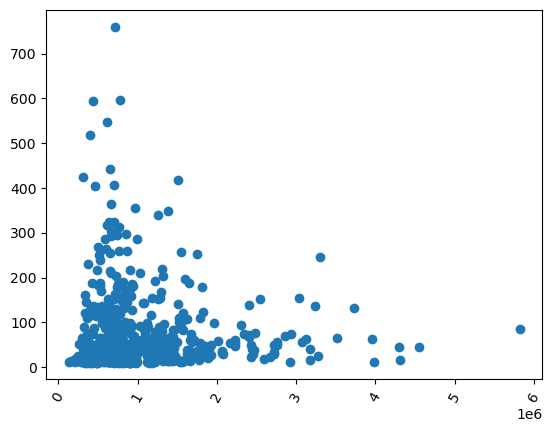

In [13]:
# Scatter Plot
plt.scatter(summed_data_10plus["2022Median"], summed_data_10plus["2022 Assaults"])

#plt.title("Total Number Of Assault Offences by Suburb for the Year 2013")
#plt.ylabel("Median")
#plt.xlabel("Assult Offences")

plt.xticks(rotation=60)
plt.show()

In [16]:
summed_data_50plus = summed_data_2022.loc[summed_data_2022["2022 Assaults"] >= 50, ["Suburb", "2022 Assaults", "2022Median"]]
summed_data_50plus

,Suburb,2022 Assaults,2022Median
0,Abbotsford,100,1517500
9,Alfredton,57,700000
12,Altona,56,1018000
13,Altona Meadows,86,750000
14,Altona North,75,920000
...,...,...,...
713,Wollert,104,705000
715,Wonthaggi,108,547500
721,Wyndham Vale,134,575000
729,Yarraville,63,1350000


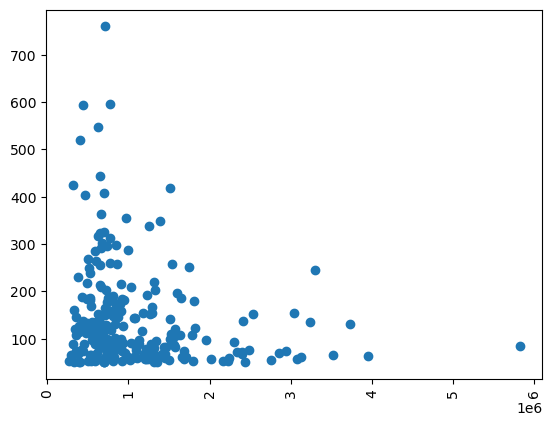

In [17]:
# Scatter Plot
plt.scatter(summed_data_50plus["2022Median"], summed_data_50plus["2022 Assaults"])

#plt.title("Total Number Of Assault Offences by Suburb for the Year 2013")
#plt.ylabel("Median")
#plt.xlabel("Assult Offences")

plt.xticks(rotation=90)
plt.show()

In [31]:
merge13_22_df = pd.merge(summed_data_2013, summed_data_2022, on="Suburb")
merge13_22_df["%changeAssaults"] = (merge13_22_df["2022 Assaults"]/merge13_22_df["Total Assault Offences"] * 100)
merge13_22_df["%changeMedHousePrice"] = (merge13_22_df["2022Median"]/merge13_22_df["Median"] * 100)

merge13_22_df

,Year_x,Suburb,Total Assault Offences,Median,Year_y,2022 Assaults,2022Median,%changeAssaults,%changeMedHousePrice
18,2013,Armstrong Creek,1,467500,2022,63,721000,6300.000000,154.224599
246,2013,Fraser Rise,2,455000,2022,49,706000,2450.000000,155.164835
142,2013,Clyde North,9,409000,2022,160,750000,1777.777778,183.374083
403,2013,Mickleham,6,213000,2022,105,665000,1750.000000,312.206573
660,2013,Weir Views,3,327500,2022,52,593500,1733.333333,181.221374
...,...,...,...,...,...,...,...,...,...
677,2013,Wimbledon Heights,5,271500,2022,1,700000,20.000000,257.826888
38,2013,Bandiana,6,339000,2022,1,449500,16.666667,132.595870
256,2013,Glengarry,6,232500,2022,1,615000,16.666667,264.516129
439,2013,Murchison,8,186000,2022,1,410000,12.500000,220.430108


In [68]:
merge13_22_df_50plus = merge13_22_df.loc[merge13_22_df["2022 Assaults"] >= 50, ["Total Assault Offences", "Suburb", "2022 Assaults", "2022Median", "%changeAssaults", "%changeMedHousePrice"]]
merge13_22_df_50plus2 = merge13_22_df_50plus.loc[merge13_22_df_50plus["Total Assault Offences"] >= 40, ["Total Assault Offences", "Suburb", "2022 Assaults", "2022Median", "%changeAssaults", "%changeMedHousePrice"]]
merge13_22_df_50plus2 = merge13_22_df_50plus2.sort_values(["%changeAssaults"], ascending=False)
#merge13_22_df_50plus2 = merge13_22_df_50plus2.sort_values(["2022Median"], ascending=False)
#merge13_22_df_50plus2 = merge13_22_df_50plus2.sort_values(["2022 Assaults"], ascending=False)
merge13_22_df_50plus2.head(15)

,Total Assault Offences,Suburb,2022 Assaults,2022Median,%changeAssaults,%changeMedHousePrice
629,44,Truganina,219,1310000,497.727273,181.944444
164,51,Cranbourne East,154,720000,301.960784,184.615385
605,111,Tarneit,323,645000,290.990991,173.854447
667,44,West Melbourne,117,1166000,265.909091,128.839779
498,118,Point Cook,295,740000,250.000000,164.444444
0,40,Abbotsford,100,1517500,250.000000,191.482650
437,58,Mount Waverley,141,1510000,243.103448,184.146341
679,57,Windsor,131,3726000,229.824561,223.113772
400,55,Mernda,124,682500,225.454545,182.000000
255,84,Glen Waverley,187,1650000,222.619048,202.453988


In [42]:
merge13_22_df_50plus2.tail(15)

,Total Assault Offences,Suburb,2022 Assaults,2022Median,%changeAssaults,%changeMedHousePrice
646,40,Wantirna,60,1105000,150.000000,191.840278
27,64,Bacchus Marsh,58,620000,90.625000,184.798808
33,45,Ballarat East,57,540000,126.666667,203.773585
630,50,Tullamarine,57,1690000,114.000000,142.616034
128,43,Chelsea,57,1205000,132.558140,208.658009
411,41,Mitcham,57,1215000,139.024390,186.923077
672,63,Whittington,57,583000,90.476190,225.096525
10,64,Altona,56,1018000,87.500000,177.043478
319,50,Keilor Downs,56,720000,112.000000,178.438662
603,57,Sydenham,55,675000,96.491228,158.823529


In [43]:
drugs_to_load = "Resources/C Drug offences.csv"

In [49]:
drugs_property_merged = pd.read_csv(drugs_to_load)
drugs_property_merged

,Year,Local Government Area,Postcode,Suburb/Town Name,Offence Division,Offence Subdivision,Offence Count,Median
0,2013,Yarra,3067,Abbotsford,C Drug offences,C10 Drug dealing and trafficking,18,792500
1,2013,Yarra,3067,Abbotsford,C Drug offences,C30 Drug use and possession,61,792500
2,2013,Moonee Valley,3042,Airport West,C Drug offences,C10 Drug dealing and trafficking,4,532000
3,2013,Moonee Valley,3042,Airport West,C Drug offences,C20 Cultivate or manufacture drugs,9,532000
4,2013,Moonee Valley,3042,Airport West,C Drug offences,C30 Drug use and possession,21,532000
...,...,...,...,...,...,...,...,...
16134,2022,Maribyrnong,3013,Yarraville,C Drug offences,C30 Drug use and possession,55,1350000
16135,2022,Moira,3730,Yarrawonga,C Drug offences,C10 Drug dealing and trafficking,10,695000
16136,2022,Moira,3730,Yarrawonga,C Drug offences,C20 Cultivate or manufacture drugs,2,695000
16137,2022,Moira,3730,Yarrawonga,C Drug offences,C30 Drug use and possession,28,695000


In [54]:
drugs_data = drugs_property_merged[drugs_property_merged["Offence Subdivision"] == "C10 Drug dealing and trafficking"]
groupeddrugs_data = drugs_data.groupby("Offence Count").count()
drugs_data.head(25)

,Year,Local Government Area,Postcode,Suburb/Town Name,Offence Division,Offence Subdivision,Offence Count,Median
0,2013,Yarra,3067,Abbotsford,C Drug offences,C10 Drug dealing and trafficking,18,792500
2,2013,Moonee Valley,3042,Airport West,C Drug offences,C10 Drug dealing and trafficking,4,532000
5,2013,Brimbank,3021,Albanvale,C Drug offences,C10 Drug dealing and trafficking,3,313000
10,2013,Brimbank,3020,Albion,C Drug offences,C10 Drug dealing and trafficking,6,379000
13,2013,Murrindindi,3714,Alexandra,C Drug offences,C10 Drug dealing and trafficking,6,261000
16,2013,Ballarat,3350,Alfredton,C Drug offences,C10 Drug dealing and trafficking,4,361500
19,2013,Moyne,3277,Allansford,C Drug offences,C10 Drug dealing and trafficking,1,310000
21,2013,Darebin,3078,Alphington,C Drug offences,C10 Drug dealing and trafficking,5,1080000
24,2013,Hobsons Bay,3018,Altona,C Drug offences,C10 Drug dealing and trafficking,1,575000
27,2013,Hobsons Bay,3028,Altona Meadows,C Drug offences,C10 Drug dealing and trafficking,9,390000


In [60]:
drsummed_data = drugs_data.groupby(["Suburb/Town Name", "Year"])["Offence Count", "Median"].sum().reset_index()
drsummed_data = drsummed_data.rename(columns={"Offence Count": " Drug dealing and trafficking", "Suburb/Town Name": "Suburb"})
drsummed_data.head(20)

C:\Users\shang\AppData\Local\Temp\ipykernel_18296\655787725.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  drsummed_data = drugs_data.groupby(["Suburb/Town Name", "Year"])["Offence Count", "Median"].sum().reset_index()


,Suburb,Year,Drug dealing and trafficking,Median
0,Abbotsford,2013,18,792500
1,Abbotsford,2014,9,862500
2,Abbotsford,2015,14,925000
3,Abbotsford,2016,7,1187500
4,Abbotsford,2017,7,1280000
5,Abbotsford,2018,24,1192500
6,Abbotsford,2019,40,1050000
7,Abbotsford,2020,37,1200000
8,Abbotsford,2021,32,1375000
9,Abbotsford,2022,27,1517500


In [67]:
# Data from the year 2022 only
drsummed_data_2022 = drugs_data[drugs_data["Year"] == 2022].groupby(["Year", "Suburb/Town Name"])[["Offence Count", "Median"]].sum().reset_index()
drsummed_data_2022 = drsummed_data_2022.rename(columns={"Offence Count": "Drug dealing and trafficking", "Suburb/Town Name": "Suburb"})
drsummed_data_2022 = drsummed_data_2022.sort_values(["Drug dealing and trafficking"] , ascending=False)
drsummed_data_2022.head(50)

,Year,Suburb,Drug dealing and trafficking,Median
349,2022,Shepparton,271,405000
204,2022,Hughesdale,114,1625000
364,2022,St Kilda,100,1515000
362,2022,St Albans,64,702500
328,2022,Reservoir,57,966000
329,2022,Richmond,50,1385000
163,2022,Frankston,46,779000
414,2022,Werribee,42,620500
283,2022,Morwell,42,315000
268,2022,Mildura,40,439500


# Merged Data
The `Resources` folder contains the following working csv files:
- `A Crimes against the person.csv`
- `B Property and deception offences.csv`
- `C Drug offences.csv`
- `D Public order and security offences.csv`
- `E Justice procedures offences.csv`
- `F Other offences.csv`

Each is a merge of cleaned crimes inner joined to cleaned property by matching suburb name.